# KNN Model in Python

### 1. Imports

In [33]:
import csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


### 2. Datasets (Train and Test)

In [3]:
X_train_load = pd.read_csv('/Users/masonware/Desktop/COSI_101A/HW5/data/training.csv') # data saved in /data/training.csv
X_test_load = pd.read_csv('/Users/masonware/Desktop/COSI_101A/HW5/data/testing.csv') # data saved at /data/testing.csv

#training data and labels
X_train = X_train_load.iloc[:, 1:].values
y_train = X_train_load.iloc[:, 0].values

#testing data
X_test = X_test_load.values


print('\nTraining Data:\n', X_train)
print('\n\nTesting Data:\n', X_test)
print('\n\n(First 10) Training Labels:\n', y_train[:10])



Training Data:
 [[ 0.78317  -1.008609 -1.111051 ... -0.85646  -0.96847  -0.333715]
 [-1.026003 -0.233585 -0.014968 ...  0.209875 -0.892699  0.063804]
 [ 0.555915  0.647914  0.504814 ... -0.238873  0.909458 -0.080437]
 ...
 [-0.795427 -0.31503  -1.397318 ... -0.35328   1.288353  1.13345 ]
 [-0.218398  0.513718 -1.250968 ... -0.782073  1.491254 -1.163395]
 [ 1.081998 -0.501509 -0.794577 ... -1.20811   0.346858  0.561956]]


Testing Data:
 [[-1.367878 -0.419243 -1.619836 ...  0.091201  0.622473 -2.564467]
 [-0.789542  1.307517  0.084476 ...  0.606668 -0.23761  -0.431384]
 [-0.077066 -1.221734  0.386193 ... -0.067291  0.495359 -1.171572]
 ...
 [-0.068324 -1.259429 -0.520822 ... -0.579941  0.008835  0.35889 ]
 [ 1.417301 -2.031305  1.416821 ...  0.138528 -0.443491  0.82036 ]
 [-1.496391 -0.424581  0.786344 ...  0.574461  0.715416  0.939019]]


(First 10) Training Labels:
 [1 1 1 1 1 1 1 1 1 1]


#### Scaling Data

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

`Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.`

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.



In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


print(f'Scaled Training Data:\n', X_train)
print(f'\n\nSclaed Testing Data:\n', X_test)


Scaled Training Data:
 [[ 0.76244623 -1.08002641 -1.04766333 ... -0.90622568 -0.96198405
  -0.27119299]
 [-1.0778513  -0.23903366 -0.00413676 ...  0.17434082 -0.88440464
   0.11015049]
 [ 0.53128159  0.71749707  0.49072204 ... -0.28039625  0.96076406
  -0.02822117]
 ...
 [-0.84330853 -0.32741112 -1.32020403 ... -0.39633015  1.34870206
   1.13627134]
 [-0.25635248  0.57187853 -1.18087141 ... -0.8308459   1.55644566
  -1.06711233]
 [ 1.06641518 -0.5297629  -0.74636405 ... -1.26256887  0.3847366
   0.5880321 ]]


Sclaed Testing Data:
 [[-1.42560782 -0.44049456 -1.53205244 ...  0.05408297  0.66692965
  -2.41117307]
 [-0.83732228  1.43324438  0.09053896 ...  0.57642949 -0.21368077
  -0.36488772]
 [-0.11258904 -1.31129226  0.37778884 ... -0.10652429  0.53678185
  -1.0749566 ]
 ...
 [-0.10369664 -1.35219579 -0.48573541 ... -0.62601621  0.03864608
   0.3932291 ]
 [ 1.40748665 -2.18977259  1.35899893 ...  0.10204161 -0.42447548
   0.83592134]
 [-1.55633172 -0.44628692  0.75875287 ...  0.5437926

### 3. Training the KNN model

So now let's run the model with a basic guess of k = 5 `(will be reviewed later)` on the training data.

In [5]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# get predictions
y_pred = classifier.predict(X_train)

### 4. Model Evaulation

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The `confusion_matrix` and `classification_report` methods of the `sklearn.metrics` can be used to calculate these metrics

In order to test the model's efficiency, I will be comparing the training data labels `(y_train)` to the obtained results of the model on the training data `(y_pred)`.

In [6]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[182  18]
 [ 12 188]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       200
           2       0.91      0.94      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



The results show that our KNN algorithm was able to classify all the 400 records in the test set with 94% accuracy, which is pretty good!


### 5. Picking The Right K

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

Here, I will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [7]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error.append(np.mean(pred_i != y_train))

Now I can plot the error values against K values...

Text(0, 0.5, 'Mean Error')

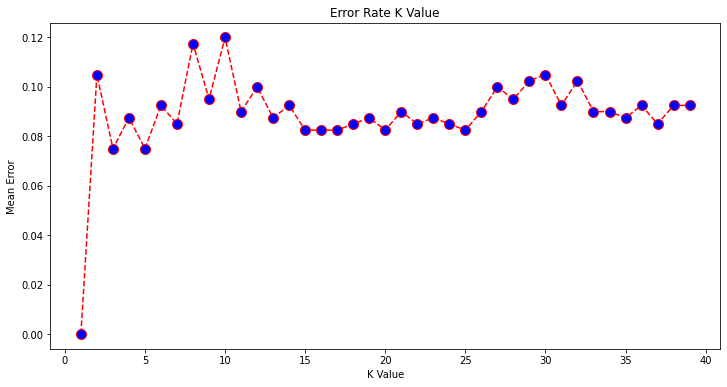

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value of the K is very low (most likely 1). However, it is important to note that all of the values of mean errors are relatively low. Therefore, most any value in the range will work. Ideally, the 5 lowest values based on their mean error are: 1, 2, 3, 7, 31, and 32. For the purposes of minimizing the error while not overfitting the model, I will use k = 31.

### 6. Running KNN On The Test Set

Now, I will load the testing unlabeled data into the classifier and send its outputs to two files: `data/results.csv` and  `data/results.txt` (The assignment specifies a text file but I think csv files are more usable so I included both).

In [56]:
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
classes = {0:'1', 1:'2'}

y_pred = classifier.predict(X_test)

#write to a text file
with open('data/results.txt', 'w') as f:
    for i in range(len(y_pred)):
        f.write(f'{y_pred[i]}    {list(X_test[i])}\n')
        
#write to a csv file
with open('data/results.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(['labels', 'samples'])
    for i in range(len(y_pred)):
        spamwriter.writerow([y_pred[i], list(X_test[i])])
